<h2><center> Total variation denoising </center></h2>

### In this demo, we solve the following minimisation problem:

$$\begin{equation}
\underset{u}{\operatorname{argmin}} \frac{1}{2} \| u - g\|^{2}_{2} + \alpha \mathrm{TV}(u)
\end{equation}$$

where,

* g is a noisy data corrupted with Gaussian noise,
* TV stands for the Total variation regulariser.

To solve the above problem, we use the **Fast Gradient Projection (FGP)** algorithm, proposed in [BeckTeboulle](https://ieeexplore.ieee.org/document/5173518).

In [1]:
# Import libraries
from cil.optimisation.functions import TotalVariation
from cil.utilities import dataexample, noise
from cil.utilities.display import show2D

We load an image from the `dataexample` class. In this demo, we use the `CAMERA` image. 

Other options are: 

* `BOAT`
* `CAMERA`
* `PEPPERS`(color)
* `RESOLUTION_CHART` 
* `SIMPLE_PHANTOM_2D` 
* `RAINBOW` (color)

In [2]:
# Load data
data = dataexample.CAMERA.get()

# Add gaussian noise
noisy_data = noise.gaussian(data, seed = 10, var = 0.02)

We use the **proximal method** of the **TotalVariation** class which implements the FGP algorithm.

In [3]:
alpha = 0.15
TV = alpha * TotalVariation(max_iteration=100)
proxTV = TV.proximal(noisy_data, tau=1.0)

Initialised GradientOperator with C backend running with  16  threads


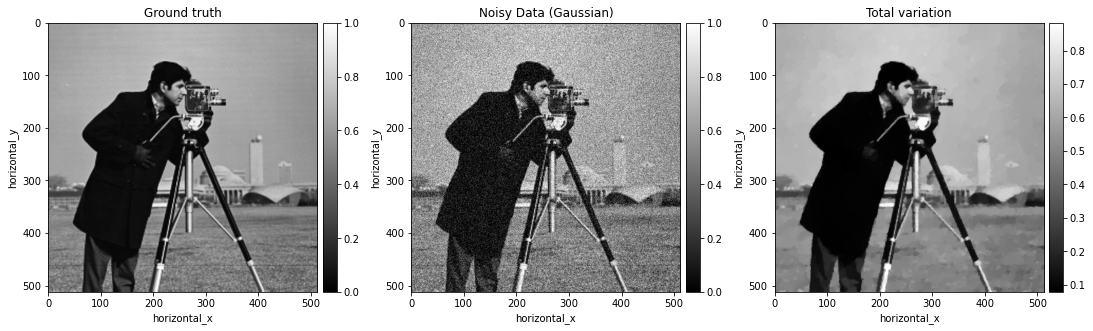

In [4]:
show2D([data, noisy_data, proxTV], 
       title=['Ground truth', 'Noisy Data (Gaussian)', 'Total variation'], 
       origin="upper", num_cols=3)